In [3]:
from arquivos import central
import matplotlib.pyplot as plt
from numba import njit
import numpy as np
import pandas as pd

In [4]:
robot = central.Central()

In [5]:
robot.get_normal_data_csv('C:\\Users\\johnk\\Google Drive\\My_Project\\Dados\\Data_D1_3k_icmarkets.csv', drop=True, drop_list=['Unnamed: 0'])

Dados Carregados com Sucesso.


In [6]:
%%time
robot.pct_data()
robot.balance_signal4()
df = robot.back_tpsl(multiply_tp=3, multiply_sl=1,analyse=False, multi_test=False, plot=False)

Wall time: 6.76 s


In [7]:
df

,Result,Short_Trades,Long_Trades,EURCHF,EURGBP,EURJPY,EURNZD,EURUSD,EURAUD,EURCAD,...,AUDJPY,CADJPY,CHFJPY,NZDJPY,AUDCHF,CADCHF,NZDCHF,AUDNZD,NZDCAD,AUDCAD
0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
1,1011.675842,994.489685,1011.675842,1011.675842,993.676758,991.193237,992.093689,994.489685,1025.773682,992.883667,...,999.928528,999.928406,999.929138,999.927124,1034.035522,988.345459,977.923706,996.683960,988.020447,994.050659
2,1006.165527,988.547058,1007.860962,1023.062866,987.365967,1017.984558,1015.990356,988.988953,1017.038757,1014.342712,...,999.856934,999.863647,999.858215,999.865845,1065.501587,976.649597,955.280762,993.345764,975.358704,987.966797
3,1000.222900,986.188904,1004.815063,1034.442749,981.034119,1008.974121,1007.914978,1005.486816,1042.311646,1007.060730,...,999.791809,999.791138,999.787292,999.793091,1097.712036,1011.571472,1022.194885,990.081238,1013.835327,1006.481995
4,996.408020,978.393921,1038.850586,1046.346313,999.996338,997.993103,999.882263,999.854065,1033.627563,1029.100708,...,999.719727,999.718811,999.720093,999.720520,1087.075684,1000.203918,1001.048828,985.533386,997.651489,997.816650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10879,14830.786133,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10880,14845.684570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10881,14841.569336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10882,14841.499023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data = robot.get_normal_data()

In [26]:
high = data['EURUSD_High'].to_numpy()
low = data['EURUSD_Low'].to_numpy()

In [28]:
sell = []
buy = []
for i in np.arange(high.size):
    if i < 3:
        buy.append(0)
        sell.append(0)
        continue
    sell.append(high[i] < high[i-1] < high[i-2] and high[i-2] > high[i-3] > high[i-4])
    buy.append(low[i] > low[i-1] > low[i-2] and low[i-2] < low[i-3] < low[i-4])
sell = np.array(sell, dtype=np.bool_)
buy = np.array(buy, dtype=np.bool_)

In [30]:
buy.sum(), sell.sum()

(175, 187)

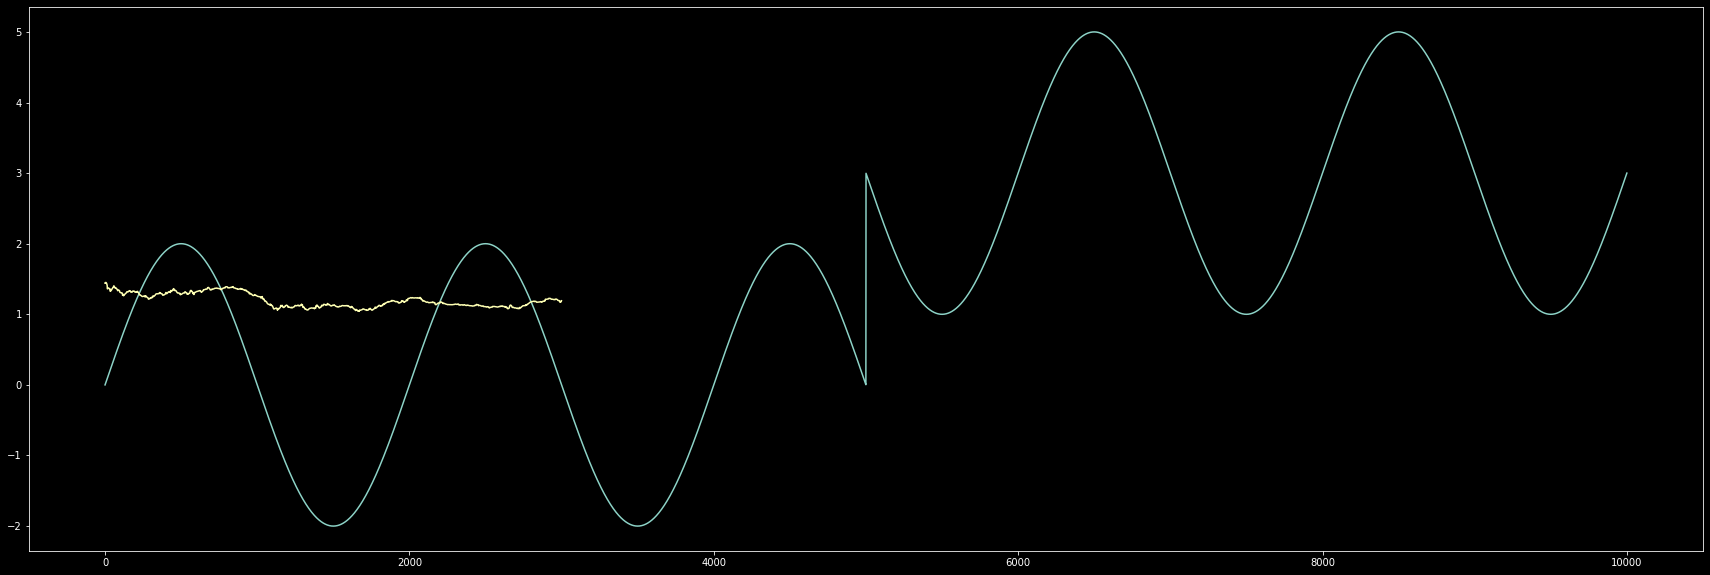

In [9]:
import numpy as np
from matplotlib import pyplot as plt

# Create input
Length = 10000
x = np.linspace(0,10 * np.pi, Length)
Price = 2 * np.sin(x)
Price[int(Length/2):Length] += 3
Noise = np.random.randn(Price.shape[0]) # white noise
#InputPrice = Price + Noise
InputPrice = data['EURUSD_Open'].to_numpy()
batch = 10

# Initialize output before the algorithm
#Filt = np.array(InputPrice)
Filt = InputPrice.copy()

# sequencially calculate all variables and the output
for i in np.arange(0, InputPrice.size-batch):
    # take 2 batches of the input
    v1 = InputPrice[i:i+batch]
    v2 = InputPrice[i+batch:i+2*batch]

    # for the 1st batch calculate N1
    H1 = np.max(v1)
    L1 = np.min(v1)
    N1 = (H1 - L1) / batch
    
    # for the 2nd batch calculate N2
    H2 = np.max(v2)
    L2 = np.min(v2)
    N2 = (H2 - L2) / batch
    
    # for both batches calculate N3    
    H = np.max([H1, H2])
    L = np.min([L1, L2])
    N3 = (H - L) / (2*batch)

    # calculate fractal dimension
    Dimen = 0
    if N1 > 0 and N2 > 0 and N3 > 0:
        Dimen = (np.log(N1 + N2) - np.log(N3)) / np.log(2)

    # calculate lowpass filter factor
    alpha = np.exp(-4.6*(Dimen - 1))
    alpha = np.max([alpha, 0.1])
    alpha = np.min([alpha, 1])    
    
    # filter the input data
    Filt[i+1] = alpha * InputPrice[i] + (1 - alpha) * Filt[i]
    # if currentBar < 2*batch + 1: <--- i dont get what these 2 lines do
        # Filt = InputPrice[i]

# plot the result to figure out the difference
# beween it (Filt) and the desired outcome (Price)
#plt.plot(Price)
plt.plot(Filt)
plt.show()

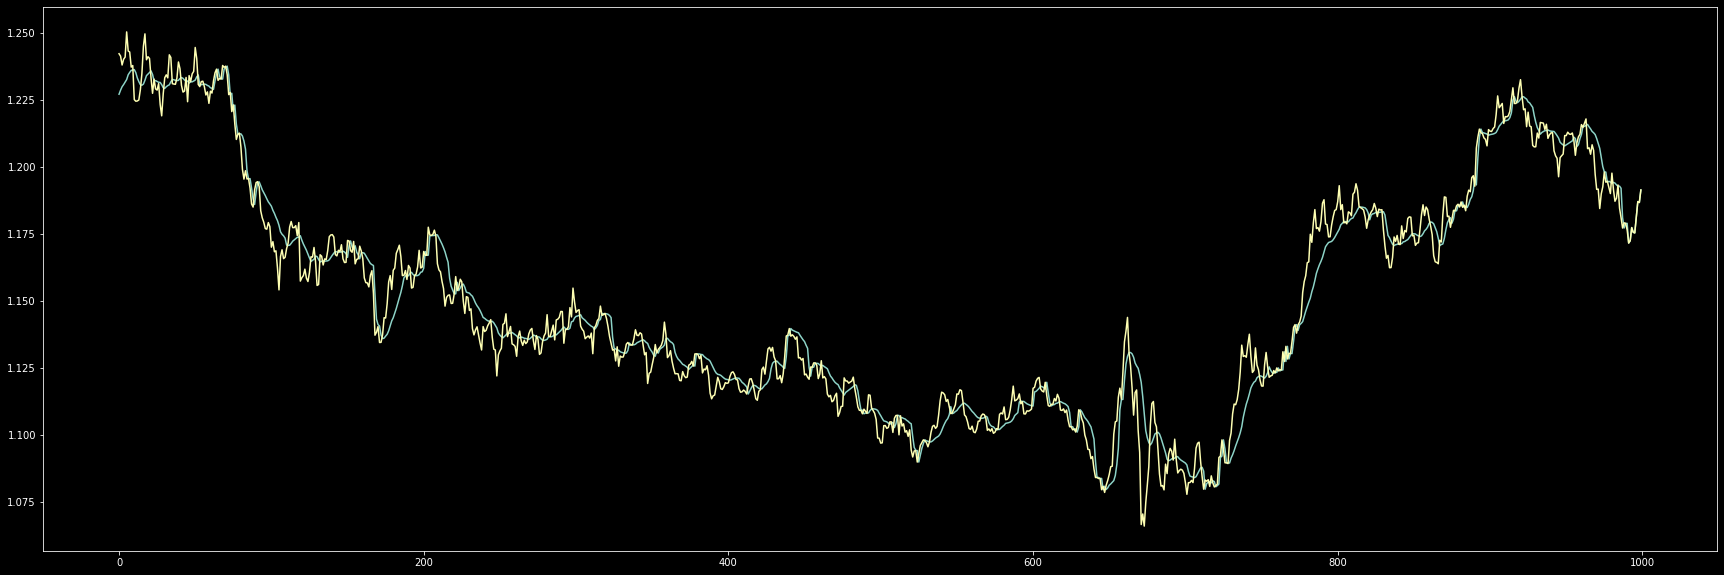

In [14]:
plt.plot(Filt[2000:])
plt.plot(InputPrice[2000:])
plt.show()

In [40]:
v2 = InputPrice[0+10:0+2*10]

In [41]:
v2

array([1.4068 , 1.40087, 1.40796, 1.38889, 1.35783, 1.36044, 1.36573,
       1.36845, 1.37442, 1.38666])